In [2]:
import pandas as pd 
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(font="monospace", font_scale=1.25, style='white')

Principal Component Analysis (PCA) is a linear dimensionality reduction technique. It is used to visualize patterns in data originating from multiple sources. I usually use it to get a first idea of genomics or proteomics data that is composed of multiple measurements and conditions.

To explain a potential use-case, let's look at the famous iris dataset. The dataset contains information about sepal length, sepal width, petal length and petal width of 3 iris species (setosa, virginica, versicolor). Do the species show similar characteristics?

In [3]:
iris_df = px.data.iris()
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


There are 4 variables (sepal length, sepal width, petal length and petal width) and it will be difficult to plot all 4 in 2D space. This is where PCA comes to help! PCA reduces the dimensionality of the data so that we can visualize it in a 2D plot. By reducing the dimensionality PCA focuses on information which is different across the variables/samples. The newly computed axes are called principal components and together they reflect the total variation of the data. Usually, we see a PCA plot showing the first (PC1) and second principal component (PC2), as PC1 contains the most variance and each following principal component represents less and less of the remaining variance in the data.

We will use pythons sklearn module for PCA analysis. First we will start by specifying the samples and variables of our dataset. We want to understand trends of samples (in our case species) by using all the available variable information (sepal length,  sepal width, petal length and petal width). To manipulate dataframes we will use the pandas module.

1. Subset the variable columns:

In [4]:
# subset the variable columns
X = iris_df.loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


2. Subset the sample column:

In [5]:
# subset the sample column
y = iris_df.loc[:, "species"]
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

3. Scaling:

Next we use the StandardScaler with fit_transform to normalize our variable dataframe. Scaling is an important step if the data was collected in different units and if the variables do not have the same scale as this will have an effect on the results. After scaling each variable will have a mean of 0 and standard deviation of 1. Note that this step might not be necessary for your analysis.

In [6]:
# scale variable columns
X = StandardScaler().fit_transform(X)

4. Assessing the principal components:

Using the PCA method we indicate the number of components (4) and call fit_tranform. We will obtain the coordinates for all 4 principal components for all 150 samples (rows) in our dataset.

In [7]:
# assess principal components
pca = PCA(n_components=4)
principal_components = pca.fit_transform(X)

5. Create barplot to visualize variance captured in each principal component:

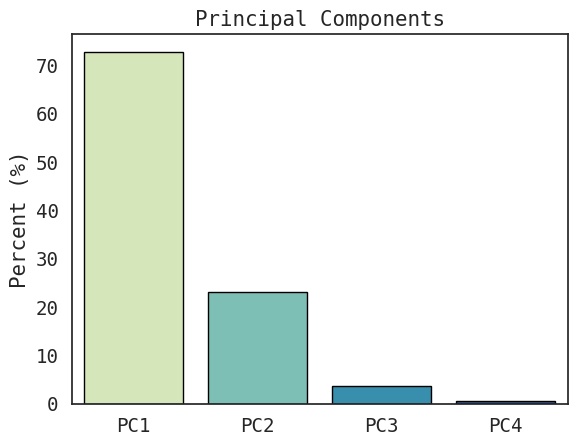

In [8]:
# create barplot to visualize variance captured in each principal component
sns.barplot(x=['PC1','PC2','PC3','PC4'],
           y=(pca.explained_variance_ratio_)*100,
           edgecolor = 'black',
           palette = 'YlGnBu').set(title='Principal Components', ylabel='Percent (%)')
#plt.savefig('captured_var_barplot.png')
plt.show()


We see that about 70% of the variation in our data is captured by PC1 and around 20% by PC2. Together they capture around 90% of variance in our data. A high percentage for the first two principal components is a good metric of what to expect when you continue with downstream analysis. The barplot we just created is also called screeplot, since we aim for a high PC1 and a quick drop towards the remaining principal components.

6. Creating dataframe for PCA plot:

We create a dataframe out of the numpy array, specify column names and combine with the corresponding sample names.

In [9]:
# create dataframe for PCA plot
principal_components_df = pd.DataFrame(data = principal_components, 
                                       columns = ['PC1', 'PC2', 'PC3', 'PC4'])
principal_components_df = pd.concat([principal_components_df, y], axis = 1)
principal_components_df

,PC1,PC2,PC3,PC4,species
0,-2.264542,0.505704,-0.121943,-0.023073,setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,setosa
2,-2.367950,-0.318477,0.051480,-0.027825,setosa
3,-2.304197,-0.575368,0.098860,0.066311,setosa
4,-2.388777,0.674767,0.021428,0.037397,setosa
...,...,...,...,...,...
145,1.870522,0.382822,0.254532,-0.388890,virginica
146,1.558492,-0.905314,-0.025382,-0.221322,virginica
147,1.520845,0.266795,0.179277,-0.118903,virginica
148,1.376391,1.016362,0.931405,-0.024146,virginica


7. PCA loadings:

To understand the contribution of variables in the PCA plot, we can compute the loadings for our PCA plot by using the .components_ method. We can then create a dataframe which we will use to add annotation to our PCA plot or create a heatmap that will indicate which variable contributes the most to each principal component.

In [10]:
# get PCA loadings dataframe
loadings_df = pd.DataFrame(data = np.transpose(pca.components_), columns = ['PC1', 'PC2', 'PC3', 'PC4'])    
X = px.data.iris().loc[:, ["sepal_length", "sepal_width", "petal_length", "petal_width"]]
loadings_df["variable"] = list(X.columns)
loadings_df

,PC1,PC2,PC3,PC4,variable
0,0.522372,0.372318,-0.721017,-0.261996,sepal_length
1,-0.263355,0.925556,0.242033,0.124135,sepal_width
2,0.581254,0.021095,0.140892,0.801154,petal_length
3,0.565611,0.065416,0.633801,-0.523546,petal_width


8. Plotting the PCA plot:

To plot the PCA plot I prefer to use plotly to create an interactive plot as a html page as well as a static plot which can be saved in different file formats. The data that I usually process contains biological or technical replicates and by using an interactive plot it is easier to identify replicates that do not fit the same patterns as other replicates. I also like to modify the borders and specify the range of x an y axis as well as adjust the plot layout. As mentioned above we will also add the loadings to the plot to understand how much weight each variable adds to each principal component.

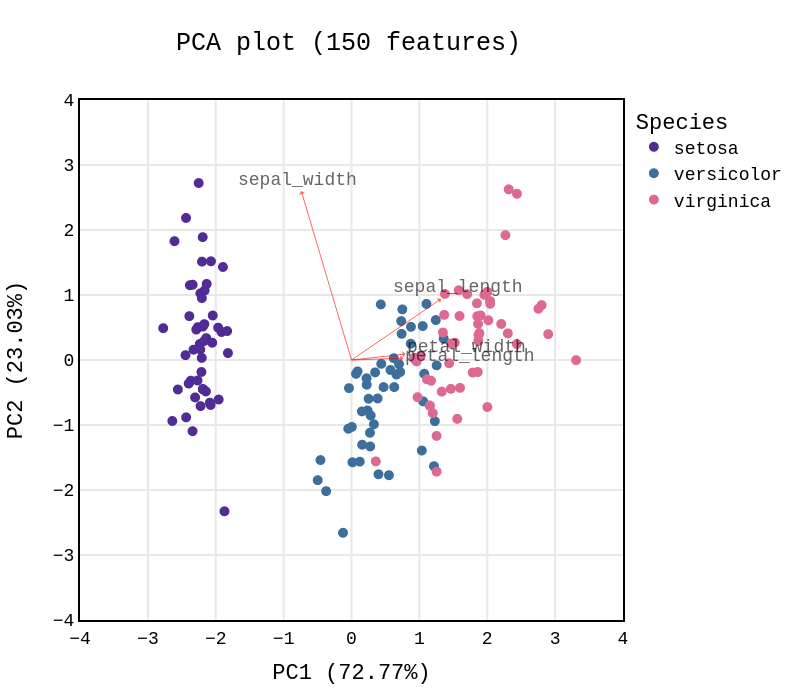

In [13]:
# plot PCA plot with loadings 
fig = px.scatter(principal_components_df, 
                 x='PC1', 
                 y='PC2', 
                 color=principal_components_df["species"],
                 color_discrete_sequence=["#512C96", 
                                          "#3C6F9C", 
                                          "#DD6892"], 
                 labels={"PC1": "PC1 ({}%)".format(round((pca.explained_variance_ratio_[0] * 100),2)),
                         "PC2": "PC2 ({}%)".format(round((pca.explained_variance_ratio_[1] * 100),2)),
                         "species": "Species"},
                 title="PCA plot"+" ("+str(iris_df.shape[0])+" features)",
                 template="plotly_white")

#updates the range of x and y axis    
fig.update_xaxes(dtick=1, range=[-4, 4])
fig.update_yaxes(dtick=1, range=[-4, 4])

#determines if border of plot should be shown
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)

#determines gridlines details
fig.update_xaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')
fig.update_yaxes(showgrid=True, gridwidth=2, gridcolor='#E8E8E8')

#determines how zerolines should be displayed
fig.update_xaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')
fig.update_yaxes(zerolinewidth=2, zerolinecolor='#E8E8E8')

#updates size of feature points in plot
fig.update_traces(marker=dict(size=10),
                  selector=dict(mode='markers')) 

#specifies layout details
fig.update_layout(height=700, 
                  width=800, 
                  showlegend=True, 
                  legend_title_text='Species',
                  font=dict(family="Courier New, monospace",
                            size=18,
                            color="black"),
                  title_x=0.22)

#add loadings
n = loadings_df.shape[0]
for i in range(n):
    fig.add_annotation(x= 0, 
                       y= 0, 
                       ax=loadings_df.iloc[i,0] * 3,  
                       ay=loadings_df.iloc[i,1] * 3, 
                       xref='x',
                       yref='y',
                       axref='x',
                       ayref='y',
                       text=loadings_df.iloc[i,4],  
                       showarrow=True,
                       arrowhead=3,
                       arrowsize=1,
                       arrowwidth=1,
                       arrowcolor='red',
                       opacity=0.6,
                       arrowside='start')

#fig.write_html("pca_plot_iris_data.html")
fig.show('png')

9. Plotting loadings as heatmap:

To plot the heatmap using the components_df we will use the seaborn module.

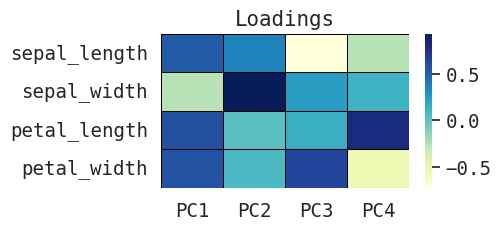

In [12]:
plt.figure(figsize=(4,2))
sns.heatmap(loadings_df.set_index("variable"),
           cmap='YlGnBu',
           linewidths=0.7,
           linecolor="black").set(title='Loadings', ylabel=None)
#plt.savefig("loadings_heatmap.png", bbox_inches='tight')
plt.show()

Conclusions and key takeaways:

- PCA is a tool to use when you want to identify patterns in mutlidimensional data
- PCA reduces the dimensionality of the data to axes which we call principal components (PC1, PC2, PC3...)
- Prinicpal components represent the variance in the data 
- By plotting PC1 and PC2 we can visualize patterns in our data and make conclusions based on clustering of data
- A high percentage of explained variance with PC1 and PC2 is a good indicator on what you are about to detect with further downstream analysis
- Understand that PCA will give you a first glimpse on patterns in the data and I prefer to be cautious when interpreting it, therefore I recommend to continue with further downstream analysis to test your hypothesis